In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dls_data = np.loadtxt('2015_07_22_Eonly0005_MILLISECONDS.asc', encoding='latin1', skiprows=28, max_rows=214)

In [3]:
tau = dls_data[:,0]
intensity = dls_data[:,1]

In [4]:
m = init.m
beta = init.beta
c = init.c

In [5]:
gamma = init.get_gamma()

In [6]:
d = init.get_distance()

In [7]:
mean = 4.487921647029171e-09
sigma = init.get_normal_sigma()

In [8]:
f = dls.generate_distribution(d, mean, sigma, c)

In [9]:
theta_input = np.append(f, c)


In [10]:
ndim = 21
nwalkers = 100
nsteps = 1500

In [11]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, intensity, m, gamma, tau*0.001)

In [12]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.382     , 0.37333333, 0.37933333, 0.38466667, 0.37      ,
       0.36866667, 0.39      , 0.34266667, 0.38      , 0.36533333,
       0.36733333, 0.37733333, 0.36866667, 0.37      , 0.37666667,
       0.36066667, 0.374     , 0.362     , 0.368     , 0.32666667,
       0.368     , 0.37533333, 0.34866667, 0.374     , 0.36333333,
       0.36666667, 0.37733333, 0.36666667, 0.35066667, 0.37933333,
       0.35333333, 0.352     , 0.36      , 0.37266667, 0.37866667,
       0.374     , 0.36333333, 0.35533333, 0.37866667, 0.382     ,
       0.366     , 0.36466667, 0.364     , 0.35333333, 0.34866667,
       0.37333333, 0.332     , 0.372     , 0.37266667, 0.382     ,
       0.35266667, 0.368     , 0.382     , 0.35333333, 0.38066667,
       0.33733333, 0.356     , 0.37866667, 0.338     , 0.34466667,
       0.376     , 0.35333333, 0.37133333, 0.37533333, 0.36733333,
       0.39133333, 0.37933333, 0.372     , 0.36333333, 0.37666667,
       0.36066667, 0.392     , 0.36066667, 0.39733333, 0.36066

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


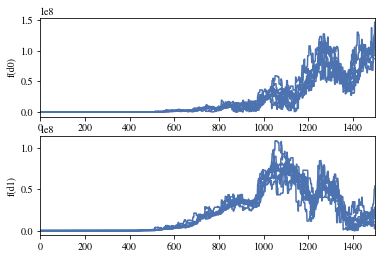

In [13]:
dls.view_burnin_plot(result, 0, 1)

In [14]:
chained_sampler = dls.chain(result, 1200, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,7.605378e+07,2.872232e+07,2.672876e+08,3.357870e+08,2.410864e+08,1.534427e+08,2.257737e+08,6.608563e+07,5.225111e+07,1.118120e+08,3.191471e+08,3.983281e+08,6.376057e+07,3.253748e+08,1.251217e+08,3.219310e+07,2.719109e+07,5.711214e+07,1.813752e+09,1.461341e+08


In [15]:
infer = np.zeros(20)
infer[0] = 7.605378e+07
infer[1] = 2.872232e+07
infer[2] = 6.376057e+07
infer[3] = 3.253748e+08
infer[4] = 1.251217e+08
infer[5] = 3.219310e+07
infer[6] = 2.719109e+07
infer[7] = 5.711214e+07
infer[8] = 1.813752e+09
infer[9] = 1.461341e+08
infer[10] = 2.672876e+08
infer[11] = 3.357870e+08
infer[12] = 2.410864e+08
infer[13] = 1.534427e+08
infer[14] = 2.257737e+08
infer[15] = 6.608563e+07
infer[16] = 5.225111e+07
infer[17] = 1.118120e+08
infer[18] = 3.191471e+08
infer[19] = 3.983281e+08

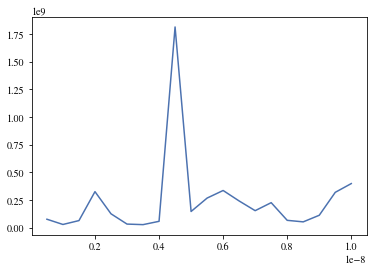

In [16]:
plt.plot(d, infer)

In [17]:
q1 = samples_df.quantile([0.8], axis=0)
q1

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.8,9.759269e+07,4.897663e+07,2.891785e+08,3.590867e+08,2.592057e+08,1.681305e+08,2.548440e+08,7.607351e+07,6.452468e+07,1.258338e+08,3.514530e+08,4.300703e+08,7.846992e+07,3.395159e+08,1.456941e+08,7.776420e+07,6.560739e+07,8.100196e+07,1.834257e+09,1.845493e+08


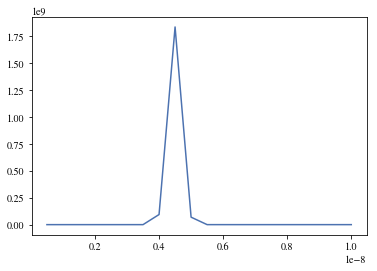

In [18]:
plt.plot(d,f)